Twitch.tv is the premier website for game streaming and gaming-related entertainment, having thousands of active streamers and millions of active viewers. The dataset used in this notebook was obtained from Kaggle, at https://www.kaggle.com/datasets/aayushmishra1512/twitchdata.  Within the top 1000 streamers on twitch, compiled in this dataset, I would like to see the differences in their streaming numbers, as well as the differences between different categories of streamers, and how that may affect their viewing numbers.

We'll start by importing the dataset so that we can view the data inside of it.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

streamers = pd.read_csv("twitchdata-update.csv")
print(streamers.head())

    Channel  Watch time(Minutes)  Stream time(minutes)  Peak viewers  \
0     xQcOW           6196161750                215250        222720   
1  summit1g           6091677300                211845        310998   
2    Gaules           5644590915                515280        387315   
3  ESL_CSGO           3970318140                517740        300575   
4      Tfue           3671000070                123660        285644   

   Average viewers  Followers  Followers gained  Views gained  Partnered  \
0            27716    3246298           1734810      93036735       True   
1            25610    5310163           1370184      89705964       True   
2            10976    1767635           1023779     102611607       True   
3             7714    3944850            703986     106546942       True   
4            29602    8938903           2068424      78998587       True   

   Mature    Language  
0   False     English  
1   False     English  
2    True  Portuguese  
3   False     

With the data now in our program, we are able to search and see different statistics. For example, we can see how many of these top 1000 streamers are listed as Mature (rated 18+ on the site).

In [12]:
#Creating a list of mature streamers
mature = []
non_mature = []
#Creating a loop to see which streamers are listed as mature
for streamer in streamers.Mature:
    if streamer == True:
        mature.append(streamer)
    else:
        non_mature.append(streamer)

print(len(mature))
percent_mature = (len(mature)/1000) * 100
print(percent_mature)

230
23.0


With this, we can see that 23% of the streamers on the top 1000 list are rated Mature. Let's see if we can put this into a visualization and show if this is correct.

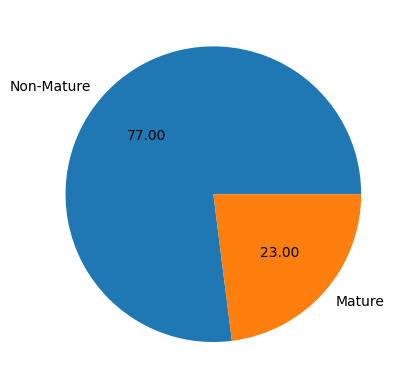

In [15]:
#Creating a pie chart to show distribution of mature streamers vs non-mature streamers
plt.pie([len(non_mature), len(mature)], labels=["Non-Mature", "Mature"], autopct='%0.2f')
plt.show()

With the data, as well as the visualization, we can pretty definitively say that 23% of the top 1000 streamers are rated as Mature. What other comparisons could we make with this dataset? We could see how the differences fare in viewerships between Mature and Non-Mature rated streaming channels. We could also separate the data in a different manner, this time separating English channels to non-English ones.

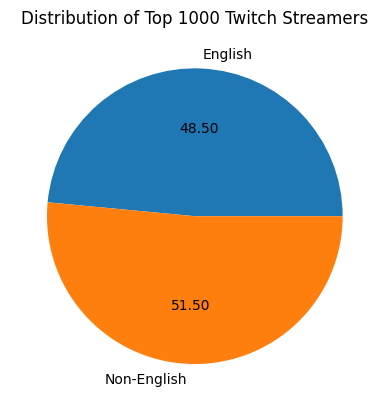

In [27]:
#Creating lists of both English and non-English channels
english = []
non_english = []

#If a streamer's language is listed as "English", we'll add that streamer to the "english" list. Otherwise, we'll add them to the "non_english" list
for streamer in streamers.Language:
    if streamer == "English":
        english.append(streamer)
    else:
        non_english.append(streamer)

#Create a pie chart showing the comparison of the two lists
plt.pie([len(english), len(non_english)], labels=["English", "Non-English"], autopct='%0.2f')
plt.title("Distribution of Top 1000 Twitch Streamers")
plt.show()

With this data, we can see that Non-English streamers slightly outnumber the English streamers, within this top 1000. How many of each of these are rated as mature?

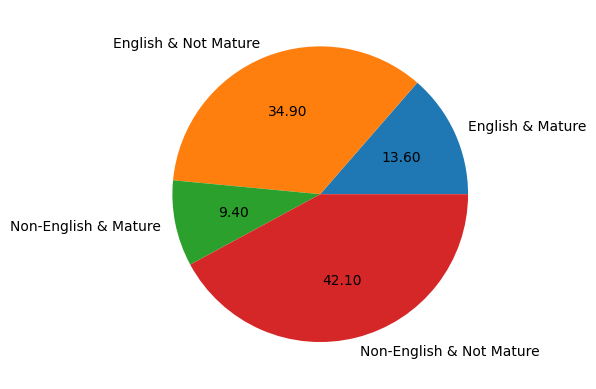

In [26]:
#creating different datasets that show streamers who are both English language and Mature-rated, as well as the opposites, and every combination thereof
english_mature = streamers[(streamers.Mature == True) & (streamers.Language == "English")]
english_nonmature = streamers[(streamers.Mature == False) & (streamers.Language == "English")]
nonenglish_mature = streamers[(streamers.Mature == True) & (streamers.Language != "English")]
nonenglish_nonmature = streamers[(streamers.Mature == False) & (streamers.Language != "English")]

#Let's map these all in a pie chart
plt.pie([len(english_mature), len(english_nonmature), len(nonenglish_mature), len(nonenglish_nonmature)], labels=["English & Mature", "English & Not Mature", "Non-English & Mature", "Non-English & Not Mature"], autopct='%0.2f')
plt.show()